<a href="https://colab.research.google.com/github/min-hee-Lee/python_workdemo/blob/master/p602_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【Data Scaling(데이터 스케일링)】
- 피처(feature)=컬럼(column) 들마다 데이터의 값이 범위가 다 제각각이거나 단위가 다른 경우 데이터를 학습을 할때 0으로 수렴하거나 무한으로 발산할 수 있다.
- 이런 경우 데이터 스켈링을 통해 모든 피처들의 데이터 분포나 범위를 동일하게 조정해 줄 수 있다.

In [ ]:
#colab
# 설치후 런타임 다시시작하면 오류가 사라짐
# https://minwook-shin.github.io/python-disk-caching-parallel-computing-using-joblib/
!pip install joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 7.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
#특정 출판사에서 저자가 그래프 이미지를 볼 수 있도록 제공
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=b6db509aeedaabd94942bc8dadc5f3a98882ac721f41db152984f74a75deb016
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
import mglearn

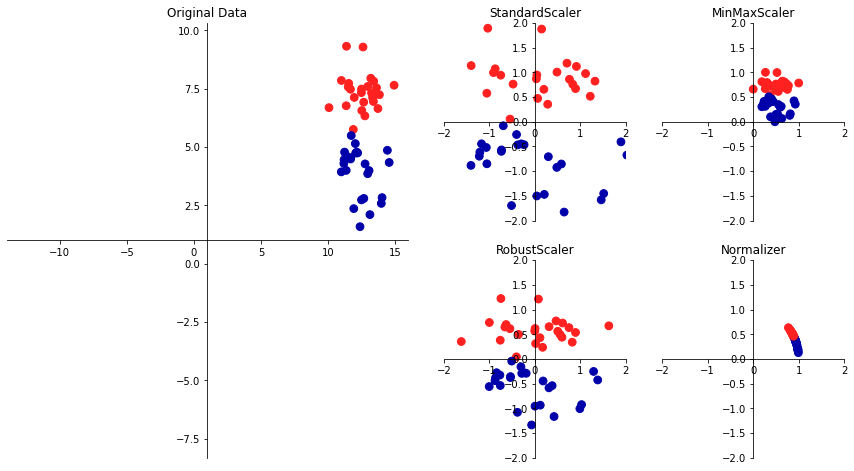

In [ ]:
mglearn.plot_scaling.plot_scaling()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [ ]:
from sklearn.model_selection import train_test_split

#일반적으로 관측값은 대문자, 정답값은 소문자 사용
# X_관측값_훈련, X_관측값_테스트, y_정답_훈련, y_정답_테스트
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2)
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [ ]:
print(X_train.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
69                5.6               2.5                3.9               1.1
73                6.1               2.8                4.7               1.2
27                5.2               3.5                1.5               0.2
34                4.9               3.1                1.5               0.2
32                5.2               4.1                1.5               0.1


In [ ]:
#기계마다 다르게 값이 나옴
print(y_train.head(3))

69    Versicolour
73    Versicolour
27         Setosa
Name: Class, dtype: object


In [ ]:
print(X_test.head(3))

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
70                5.9               3.2                4.8               1.8
54                6.5               2.8                4.6               1.5
45                4.8               3.0                1.4               0.3


In [ ]:
print(y_test.head(3))

70    Versicolour
54    Versicolour
45         Setosa
Name: Class, dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2, stratify = iris['Class'])
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [ ]:
#데이터를 나눌 때 비율이 같아야함.
y_train.value_counts()

Versicolour    40
Virginica      40
Setosa         40
Name: Class, dtype: int64

In [ ]:
#type(y_train)

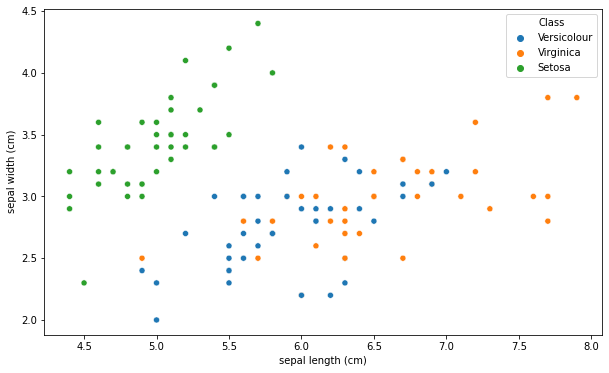

In [ ]:
fig = sns.scatterplot(data=X_train, x=X_train.iloc[:,0], y=X_train.iloc[:,1], hue=y_train)
fig.figure.set_size_inches(10,6)

### Standard Scaling


- 표준화 방식으로 평균이 0, 분산이 1인 정규분포로 스케일링 한다.
- 최소값과 최대값의 크기를 제한하지 않아 이상치에 매우 민감하므로 이상치를 미리 확인 및 정제한 후 사용하는 것이 좋다.
- 회귀보다는 분류분석에서 유용한다.

In [ ]:
StdScaler = StandardScaler()

#Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train)   #fit()은 학습을 시키는 메소드이다.
X_train_sc = StdScaler.transform(X_train)  #transform()은 실제로 학습시킨 것을 적용하는 메소드이다.

#Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)
                                 
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)" %(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"  %(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))               

#결과값은 각자 다름

		(min, max) (mean, std)
Train_scaled (-2.33, 2.98) (0.00, 1.00)
Test_scaled (-1.85, 2.29) (0.07, 0.99)


In [ ]:
#X_train의 원래 데이터
print(X_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
97                 6.2               2.9                4.3               1.3
125                7.2               3.2                6.0               1.8
86                 6.7               3.1                4.7               1.5
63                 6.1               2.9                4.7               1.4
65                 6.7               3.1                4.4               1.4


In [ ]:
#StdScaler 이후 X_train의 데이터
print(X_train_sc[:5,:])

[[ 0.46139899 -0.3412059   0.32068724  0.14771661]
 [ 1.67827545  0.32276234  1.2971081   0.81410731]
 [ 1.06983722  0.10143959  0.55043333  0.41427289]
 [ 0.33971134 -0.3412059   0.55043333  0.28099475]
 [ 1.06983722  0.10143959  0.37812376  0.28099475]]


In [ ]:
xt = pd.DataFrame(X_train_sc.T)

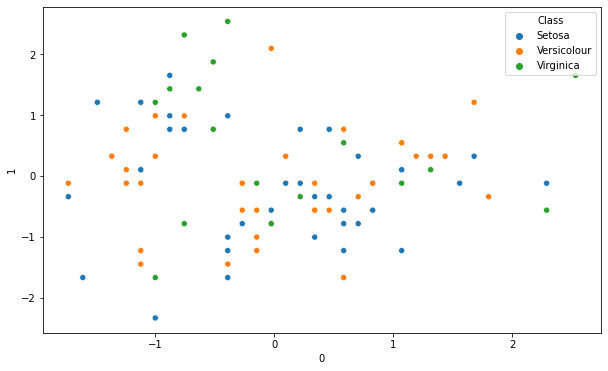

In [ ]:
fig = sns.scatterplot(data=xt, x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

###Min-Max Scaler
- 모든 피처들이 0과 1사이의 값으로 스케일링하는 방식이며 최소값0, 최대값이 1이 된다.
- 데이터가 2차원인 경우, 모든 데이터는 x, y 축의 0과 1 사이에 존재한다.
- 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포하게 때문에 데이터 그대로 스케일링 방법으로 적절하지 않다.(즉 이상치에 취약하다)
- 그러므로 이상치를 미리 정제한 후 수행하는 것이 좋다.
- 분류보다 회식에 유용하다.



In [ ]:
#위에서 한 번에 import함
#from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)  #학습시킴
X_train_sc = MmScaler.transform(X_train)  #학습시킨 것을 적용

# Test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.45, 0.27)
Test_scaled (-0.03, 1.04) (0.46, 0.27)


[0.51428571 0.375      0.57894737 0.5        0.8        0.5
 0.87719298 0.70833333 0.65714286 0.45833333 0.64912281 0.58333333
 0.48571429 0.375      0.64912281 0.54166667 0.65714286 0.45833333
 0.59649123 0.54166667 0.4        0.33333333 0.71929825 0.95833333
 0.6        0.41666667 0.78947368 0.70833333 0.45714286 0.41666667
 0.66666667 0.70833333 0.54285714 0.29166667 0.68421053 0.70833333
 0.65714286 0.20833333 0.84210526 0.70833333 0.34285714 0.20833333
 0.50877193 0.41666667 0.31428571 0.25       0.59649123 0.45833333
 0.08571429 0.5        0.05263158 0.04166667 0.91428571 0.41666667
 0.98245614 0.83333333 0.6        0.33333333 0.63157895 0.58333333
 0.31428571 0.125      0.52631579 0.5        0.57142857 0.5
 0.61403509 0.58333333 0.54285714 0.20833333 0.68421053 0.58333333
 0.45714286 0.08333333 0.70175439 0.58333333 0.37142857 1.
 0.0877193  0.125      0.42857143 0.41666667 0.71929825 0.70833333
 0.45714286 0.58333333 0.61403509 0.625      0.2        0.75
 0.15789474 0.125      

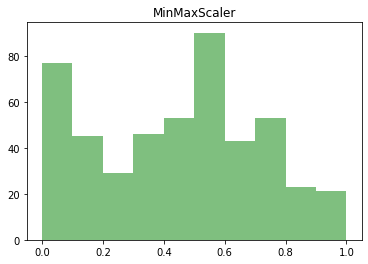

In [ ]:
X_train_sc_flat = X_train_sc.flatten()
print(X_train_sc_flat)
plt.hist(X_train_sc_flat,  color='green', alpha=0.5)
plt.title('MinMaxScaler')
plt.show()

In [ ]:
xt = pd.DataFrame(X_train_sc.T)

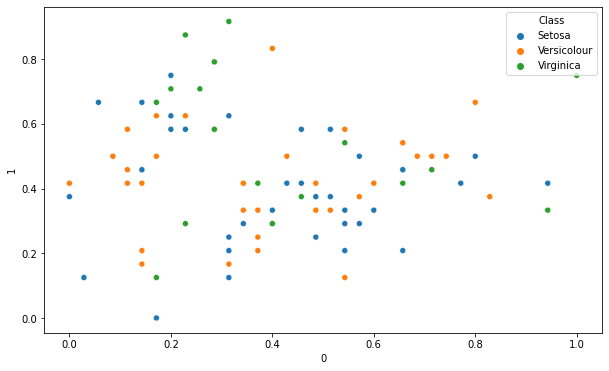

In [ ]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### Max Abs Scaler
- 모든 피처들이 절대값이 0과 1사이가 되도록 스케일링 합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다.
- 이상치에 민감하며, 분류보다는 회귀분석에서 유용한다.

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MaScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.62, 0.24)
Test_scaled (0.04, 1.03) (0.63, 0.24)


In [ ]:
xt = pd.DataFrame(X_train_sc.T)

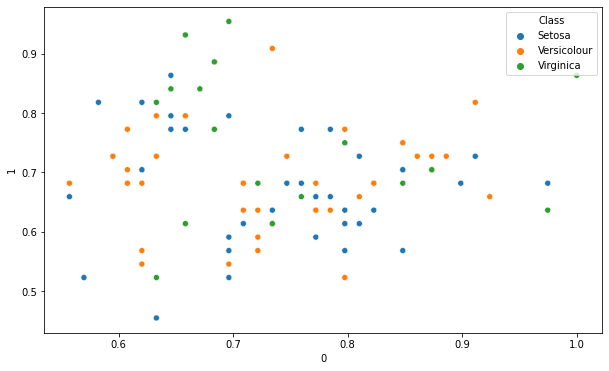

In [ ]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### Robust Scaler
- StandardScaler는 평균과 분산을 사용했지만 RobustScaler는 평균과 분산 대신 중앙값(Median)과 사분위(quartile) 값을 활용하는 방식으로, 중앙값을 0으로 설정하고 IQR을 사용하여 이상치의 영향을 최소화한다.


In [ ]:
#from sklearn.preprocessing import RobustScaler


RuScaler = RobustScaler()


# Train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)


# Test 데이터의 스케일링
X_test_sc = RuScaler.transform(X_test)




print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))


		(min, max) (mean, std)
Train_scaled (-1.67, 2.33) (-0.03, 0.62)
Test_scaled (-1.22, 1.55) (0.01, 0.59)


In [ ]:
xt = pd.DataFrame(X_train_sc.T)

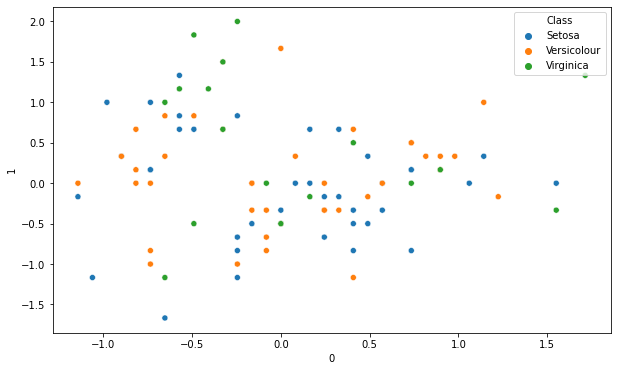

In [ ]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### RubustScaler 원본스케일로 변경

In [ ]:
print(X_train.head(3))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
97                 6.2               2.9                4.3               1.3
125                7.2               3.2                6.0               1.8
86                 6.7               3.1                4.7               1.5


In [ ]:
X_Original = RuScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_Original).head(3)

,0,1,2,3
0,6.727669,3.212527,6.240760,1.538177
1,6.676236,3.190745,6.495884,1.568235
2,6.724352,3.209479,6.255579,1.553402


### Normalizer
- 앞의 4가지 방법은 각 피처(feature)의 통계치를 이용한다. 즉, 열(columns)를 대상으로 한다.
- 그러나 Normalizer 의 경우 각 행(row)마다 정규화가 진행한다.
- 이는 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만들어 준다.
- 이렇게 하면 좀 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수 있다.


In [ ]:
from sklearn.preprocessing import Normalizer

NoScaler = Normalizer()

# Train 데이터의 fitting과 스케일링
NoScaler.fit(X_train)
X_train_sc = NoScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = NoScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.01, 0.86) (0.44, 0.24)
Test_scaled (0.02, 0.83) (0.44, 0.24)


In [ ]:
xt = pd.DataFrame(X_train_sc.T)

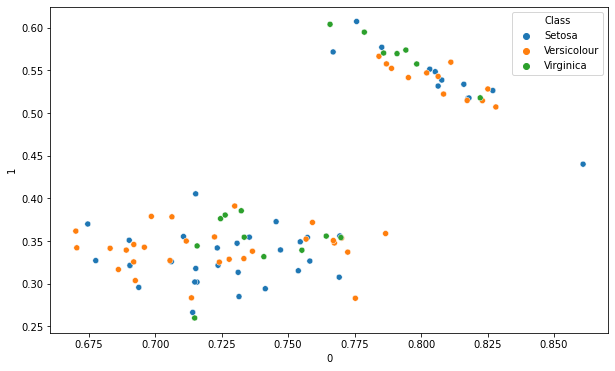

In [ ]:
fig = sns.scatterplot(data=xt , x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)